# Branje člankov Contributions to Contemporary History

Primer uporabe API-ja za prenos člankov s strežnika ter branje in izpisovanje dokumentov z meta podatki.

In [1]:
from textsemantics.server_api import ServerAPI

Ustvarimo povezavo s strežnikom. Pri povezovanju na strežnik projekta ni potrebno podati naslova strežnika. Nato pridobimo imena vseh korpusov (naborov podatkov), ki so na voljo na strežniku, in jih izpišemo.

In [2]:
api = ServerAPI()
datasets = api.list_datasets()
for name, path in datasets: print(name)

CTCH
elektrotehniski-vestnik-clanki
predlogi-vladi
zakoni-o-registrih


Izberemo korpus `CTCH`, ki vsebuje članke revije Prispevki za novejšo zgodovino.

In [3]:
api.get_dataset_info('CTCH')

{'Instances number': 84, 'Metadata type': 'CSV'}

Izpišemo meta podatke za prvih 10 dokumentov izbranega korpusa.

In [4]:
metadata = api.get_metadata('CTCH')
metadata.head(10)

,Title,Abstract,Keywords,File,URL
0,Hrana na bojiščih prve svetovne vojne: izkušnj...,Prehrana vojakov na bojišču je bila vedno izre...,"['Avstro-Ogrska', '1. svetovna vojna', 'vojašk...",http://file.biolab.si/text-semantics/data/CTCH...,https://ojs.inz.si/pnz/article/view/95/109
1,Ženske v vojni in o véliki vojni,Članek se ukvarja z vplivi prve svetovne vojne...,"['prva svetovna vojna', 'ženske', 'zgodovina s...",http://file.biolab.si/text-semantics/data/CTCH...,https://ojs.inz.si/pnz/article/view/91/113
2,»Militarizacija materinstva« – ženski »naravni...,"Prispevek s pomočjo publicistike, zakonodaje, ...","['materinstvo', 'rodnost', 'vzgoja', 'otroci',...",http://file.biolab.si/text-semantics/data/CTCH...,https://ojs.inz.si/pnz/article/view/92/114
3,Skrb v službi vojne: bolniške strežnice na Kra...,Že pred začetkom prve svetovne vojne je v Avst...,"['bolniške sestre', 'strežnice', 'prva svetovn...",http://file.biolab.si/text-semantics/data/CTCH...,https://ojs.inz.si/pnz/article/view/84/111
4,K razumevanju ženskega dela v veliki vojni1,Članek se ukvarja s presekom vojne ekonomije i...,"['prva svetovna vojna', 'vojno gospodarstvo', ...",http://file.biolab.si/text-semantics/data/CTCH...,https://ojs.inz.si/pnz/article/view/90/106
5,Vojaške preskrbnine in pokojnine v prvi svetov...,Prispevek obravnava pristop Avstro-Ogrske k iz...,"['socialna varnost', 'socialna politika', 'prv...",http://file.biolab.si/text-semantics/data/CTCH...,https://ojs.inz.si/pnz/article/view/88/110
6,O zgodovinopisju o španski državljanski vojni,Avtor članka obravnava glavne težnje v razisko...,"['državljanska vojna', 'Španija', 'zgodovinopi...",http://file.biolab.si/text-semantics/data/CTCH...,https://ojs.inz.si/pnz/article/view/155/182
7,Spopad »dveh Španij« z vidikov socialne strukt...,V ospredju pričujoče razprave je analiza špans...,"['Španija', 'Republika', 'državljanska vojna (...",http://file.biolab.si/text-semantics/data/CTCH...,https://ojs.inz.si/pnz/article/view/144/168
8,Frankistična vstaja kot oživitev rekonkviste: ...,Avtor v članku opozarja na poglavitni razlog z...,"['Španija', 'vojaški udar', 'Falanga', 'Franco...",http://file.biolab.si/text-semantics/data/CTCH...,https://ojs.inz.si/pnz/article/view/145/169
9,Kocbekovo Premišljevanje o Španiji,Španska državljanska vojna je ideološka naspro...,"['španska državljanska vojna', 'politični kato...",http://file.biolab.si/text-semantics/data/CTCH...,https://ojs.inz.si/pnz/article/view/153/180


Izberemo prvi dokument in ga naložimo. Nato pogledamo vsebino.

In [5]:
doc = api.get_text(metadata["File"][0])
" ".join(doc.split())

'1. Raziskovanje vojaških izkušenj V zadnjih desetletjih se je raziskovanje 1. svetovne vojne v Sloveniji precej okrepilo. Kljub temu pa v našem poznavanju tega obdobja ostajajo pomembne bele lise in mednje gotovo sodi vojaška izkušnja, ki zajema tako objektivne okoliščine kot tudi njihovo subjektivno doživljanje. Izšli so sicer številni vojaški dnevniki, spomini in nekatere korespondence, vendar to gradivo še ni bilo sistematično historiografsko obdelano. Vojaškim izkušnjam so zgodovinarji namenili nekaj pozornosti, vendar praviloma niso bile v fokusu zanimanja, ali pa so bile tematizirane v krajših tekstih, ki ne omogočajo zelo izčrpne obravnave. Kljub temu so zanimivi in prinašajo dragocene podatke in interpretacije. Vsekakor to velja za vrsto tekstov Marte Verginella, v katerih je analizirala avtobiografska pisanja slovensko govorečih vojakov in civilistov iz časa prve svetovne vojne. Prav tako je kljub majhnemu obsegu zelo koristen novejši tekst Marka Štepca, trenutno verjetno naj

Ker dokumentov ne bomo brali enega za drugim, si poglejmo raje lastnosti celotnega nabora besedil.

In [6]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from lemmagen.lemmatizer import Lemmatizer
from lemmagen import DICTIONARY_SLOVENE

def preprocess(doc):
    stop_words = set(stopwords.words('slovene'))
    tokenizer = RegexpTokenizer("\w+")
    lemmatizer = Lemmatizer(dictionary=DICTIONARY_SLOVENE)
    tokens = tokenizer.tokenize(doc.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens 
              if token not in stop_words 
              and len(token) > 2 
              and not token.isnumeric()]
    return tokens

Najprej pripravimo korpus, ki je zbirka vseh besedil revije Prispevki za novejšo zgodovino.

In [7]:
corpus = []
for i in :
    corpus.append(api.get_text(i))

Pripravimo pojavnice, ki bodo osnovna enota naše analize.

In [8]:
tokens = preprocess(' '.join(corpus))

In [9]:
print(f"Število besed v korpusu: {len(tokens)}")
print(f"Število unikatnih besed: {len(set(tokens))}")

Število besed v korpusu: 293814
Število unikatnih besed: 25319


Nato prikažemo najpogostejših 10 besed v korpusu. Očitno večina prispevkov govori o slovenski politični zgodovini in tvorjenju države.

In [10]:
dist = nltk.FreqDist(tokens)
common = dist.most_common(10)
print("Najpogostejših 10 besed v korpusu:")
for word, count in common: print(f"    {word}: {count}")

Najpogostejših 10 besed v korpusu:
    let: 3023
    slovenski: 2204
    političen: 1975
    država: 1659
    vojen: 1621
    stranka: 1594
    th: 1346
    imeti: 1336
    velik: 1236
    nov: 1160


Za konec prikažimo najpogostejše besede še v oblaku besed.

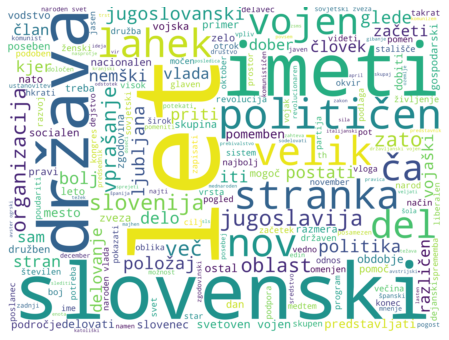

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=4000, height=3000, random_state=0, background_color="white"
).generate(" ".join(tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");